<a href="https://colab.research.google.com/github/vishshukla1234/ML-Projects/blob/main/IMDB_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing the neccessary libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
reviews_dataset = pd.read_csv('/content/IMDB_Dataset_4k.csv')

In [6]:
reviews_dataset.head()

,review,sentiment
0,Not long enough to be feature length and not a...,negative
1,"Yes, I loved this movie when I was a kid. When...",positive
2,For those who never saw A CHORUS LINE onstage ...,negative
3,I was not really a big fan of Star Trek until ...,positive
4,This movie should be number one on the bottom ...,negative


In [7]:
reviews_dataset.tail()

,review,sentiment
5924,The BFG is one of Roald Dahl's most cherished ...,negative
5925,This film is a great disappointment. Director ...,negative
5926,It came by surprise. . .the impact & resolouti...,positive
5927,It's pretty evident that many of your nights w...,positive
5928,"From the critical acclaim, I expected more fro...",negative


In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
reviews_dataset['sentiment'].replace({'positive':1,'negative':0},inplace=True)

/tmp/ipython-input-9-4204421384.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reviews_dataset['sentiment'].replace({'positive':1,'negative':0},inplace=True)
/tmp/ipython-input-9-4204421384.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  reviews_dataset['sentiment'].replace({'positive':1,'n

In [10]:
reviews_dataset

,review,sentiment
0,Not long enough to be feature length and not a...,0.0
1,"Yes, I loved this movie when I was a kid. When...",1.0
2,For those who never saw A CHORUS LINE onstage ...,0.0
3,I was not really a big fan of Star Trek until ...,1.0
4,This movie should be number one on the bottom ...,0.0
...,...,...
5924,The BFG is one of Roald Dahl's most cherished ...,0.0
5925,This film is a great disappointment. Director ...,0.0
5926,It came by surprise. . .the impact & resolouti...,1.0
5927,It's pretty evident that many of your nights w...,1.0


In [11]:
reviews_dataset.isnull().sum()

,0
review,1212
sentiment,1212


In [12]:
cleaned_dataset = reviews_dataset.dropna()

In [13]:
# counting total +ve and -ve review
cleaned_dataset.sentiment.value_counts()

,count
sentiment,
1.0,2379
0.0,2338


In [14]:
cleaned_dataset

,review,sentiment
0,Not long enough to be feature length and not a...,0.0
1,"Yes, I loved this movie when I was a kid. When...",1.0
2,For those who never saw A CHORUS LINE onstage ...,0.0
3,I was not really a big fan of Star Trek until ...,1.0
4,This movie should be number one on the bottom ...,0.0
...,...,...
5924,The BFG is one of Roald Dahl's most cherished ...,0.0
5925,This film is a great disappointment. Director ...,0.0
5926,It came by surprise. . .the impact & resolouti...,1.0
5927,It's pretty evident that many of your nights w...,1.0


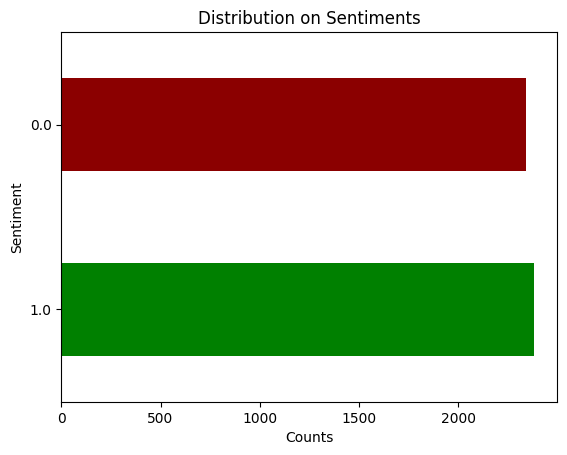

In [15]:
sentiment_counts=cleaned_dataset['sentiment'].value_counts()

sentiment_counts.plot(kind='barh', color=['green','darkred'])
plt.title('Distribution on Sentiments')
plt.xlabel('Counts')
plt.ylabel('Sentiment')
plt.show()

In [16]:
port_stemmer = PorterStemmer()

In [17]:
stop_word = stopwords.words('english')

def stemming(text):
  text = re.sub('[^a-zA-Z]', ' ', text)
  text = text.lower()
  text = text.split()
  text = [port_stemmer.stem(word) for word in text if not word in stop_word]
  text = ' '.join(text)
  return text

In [18]:
cleaned_dataset['stemmed_content'] = cleaned_dataset['review'].apply(stemming)

/tmp/ipython-input-18-1866392253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_dataset['stemmed_content'] = cleaned_dataset['review'].apply(stemming)


In [19]:
cleaned_dataset['stemmed_content']

,stemmed_content
0,long enough featur length abrupt enough short ...
1,ye love movi kid grow saw movi mani time dad b...
2,never saw choru line onstag exposur stori film...
3,realli big fan star trek past year thank adven...
4,movi number one bottom act horribl son watch n...
...,...
5924,bfg one roald dahl cherish book anim adapt mag...
5925,film great disappoint director vicent aranda p...
5926,came surpris impact resolout film automat way ...
5927,pretti evid mani night spent alon watch minut ...


In [20]:
X = cleaned_dataset['stemmed_content']
Y = cleaned_dataset['sentiment']

In [21]:
print(X)

0       long enough featur length abrupt enough short ...
1       ye love movi kid grow saw movi mani time dad b...
2       never saw choru line onstag exposur stori film...
3       realli big fan star trek past year thank adven...
4       movi number one bottom act horribl son watch n...
                              ...                        
5924    bfg one roald dahl cherish book anim adapt mag...
5925    film great disappoint director vicent aranda p...
5926    came surpris impact resolout film automat way ...
5927    pretti evid mani night spent alon watch minut ...
5928    critic acclaim expect movi tamara jenkin stori...
Name: stemmed_content, Length: 4717, dtype: object


In [22]:
print(Y)

0       0.0
1       1.0
2       0.0
3       1.0
4       0.0
       ... 
5924    0.0
5925    0.0
5926    1.0
5927    1.0
5928    0.0
Name: sentiment, Length: 4717, dtype: float64


In [148]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Reset the index of Y_train and Y_test
Y_train = Y_train.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

In [149]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

In [150]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [151]:
print(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 338201 stored elements and shape (3773, 5000)>
  Coords	Values
  (0, 3582)	0.06166064546929165
  (0, 1741)	0.11707708803850697
  (0, 252)	0.134422699474132
  (0, 2092)	0.10396392860011043
  (0, 4628)	0.07273791830247502
  (0, 2996)	0.07594286402279471
  (0, 4474)	0.08134980460519406
  (0, 1465)	0.11707708803850697
  (0, 318)	0.07079028089679151
  (0, 3761)	0.10452133040320773
  (0, 965)	0.10569038951831423
  (0, 3092)	0.08370122891770597
  (0, 2203)	0.10694013531148577
  (0, 3631)	0.07727627799832164
  (0, 32)	0.11303503690310762
  (0, 173)	0.053706623442679804
  (0, 61)	0.0861970607143053
  (0, 4909)	0.047000886217866
  (0, 2118)	0.10396392860011043
  (0, 2450)	0.07293481295055171
  (0, 3736)	0.08282597996263605
  (0, 3640)	0.0870397302913931
  (0, 1183)	0.05207066314325103
  (0, 2635)	0.043447788077947844
  (0, 477)	0.0660919740895923
  :	:
  (3772, 1533)	0.13692785365127758
  (3772, 2605)	0.10114594920595238
  (3772, 2554

In [152]:
print(X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 82869 stored elements and shape (944, 5000)>
  Coords	Values
  (0, 81)	0.0715365255160488
  (0, 83)	0.08537713334470673
  (0, 134)	0.03256948112527582
  (0, 242)	0.0742820789912699
  (0, 288)	0.04023329073060506
  (0, 291)	0.06132632262037188
  (0, 293)	0.03435325908563237
  (0, 329)	0.06335698813387067
  (0, 394)	0.05987300246280163
  (0, 479)	0.21323085749102105
  (0, 492)	0.10664712178634508
  (0, 525)	0.05601674727579693
  (0, 531)	0.07256961120260975
  (0, 629)	0.06308605085493055
  (0, 742)	0.028833134052028312
  (0, 754)	0.07490408998719922
  (0, 807)	0.08029344331573025
  (0, 852)	0.06711180162923376
  (0, 899)	0.07178757633002918
  (0, 926)	0.06335698813387067
  (0, 980)	0.0715365255160488
  (0, 983)	0.06767501716142617
  (0, 1002)	0.08077355873485531
  (0, 1183)	0.07865957445282043
  (0, 1237)	0.05997947681714687
  :	:
  (943, 4137)	0.08299527138325735
  (943, 4138)	0.07017265531005874
  (943, 4171)	0.1024815020178

In [153]:
model = LogisticRegression()

In [154]:
model.fit(X_train.toarray(), Y_train)

LogisticRegression()

###Accuracy Score(Training data)

In [155]:
X_train_prediction = model.predict(X_train.toarray())

In [156]:
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [157]:
print('Training Accuracy: ', training_data_accuracy)

Training Accuracy:  0.9440763318314339


###Accuracy Score(Testing data)

In [158]:
X_test_prediction = model.predict(X_test.toarray())

In [159]:
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [160]:
print('Testing Accuracy: ', testing_data_accuracy)

Testing Accuracy:  0.8347457627118644


###Saving the model

In [161]:
import pickle

In [162]:
filename = 'trained1_model.sav'
pickle.dump(model, open(filename, 'wb'))

###Using the saved model for prediction

In [163]:
loaded_model = pickle.load(open('/content/trained1_model.sav', 'rb'))

In [178]:
X_new = X_test[9]
print(Y_test[9])

prediction = model.predict(X_new.toarray())
print(prediction)

if prediction[0] == 0:
  print('Negative')
else:
  print('Positve')

1.0
[1.]
Positve
